# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

**Note: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting code or results.**

---

## Overview

This notebook helps you explore [Dandiset 000563, version 0.250311.2145](https://dandiarchive.org/dandiset/000563/0.250311.2145), titled _Allen Institute Openscope - Barcoding_. The Dandiset comprises extracellular electrophysiological recordings and related data from mouse brain visual areas responding to white noise visual stimuli, enabling investigation into neural "barcode" patterns and precise spike timing.

**Citation:**  
Reinagel, Pamela; Lecoq, Jérôme; Durand, Séverine; Gillis, Ryan; ...; Howard, Robert (2025) Allen Institute Openscope - Barcoding (Version 0.250311.2145) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000563/0.250311.2145

**Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, barcoding, temporal precision

---

## What this notebook covers:
- Summarizes dataset contents and metadata.
- Shows how to access Dandiset assets using the DANDI API.
- Demonstrates how to load and inspect a remote NWB file.
- Visualizes Local Field Potential (LFP) data across electrodes.
- Illustrates examining metadata tables.
- Provides links for external exploration (Neurosift).

_**Tip:** The datasets may be large; this notebook demonstrates working with manageable data slices for efficient exploration._

## Required packages
This notebook requires the following Python packages (assumed to be pre-installed):

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `pandas`
- `matplotlib`
- `seaborn`

_Please ensure these are installed before running the notebook._

In [1]:
# Import packages
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
import pynwb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For visualization aesthetics
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 5)

## 1. Explore Dandiset Metadata

In [2]:
# Connect to DANDI archive and get Dandiset
dandiset_id = "000563"
dandiset_version = "0.250311.2145"
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)
metadata = dandiset.get_raw_metadata()

print(f"Dandiset ID: {metadata.get('identifier', '')}")
print(f"Name: {metadata.get('name', '')}")
print(f"Version: {metadata.get('version', '')}")
print(f"Description:\n{metadata.get('description', '')}\n")
# Display contributor names if possible
contributors = metadata.get('contributor', [])
if contributors and isinstance(contributors[0], dict):
    contributors_str = "; ".join(str(c.get("name", c)) for c in contributors)
else:
    contributors_str = "; ".join(str(c) for c in contributors)
print(f"Contributors: {contributors_str}\n")
print("Keywords:", ", ".join(metadata.get('keywords', [])))
print("\nCitation:")
print(metadata.get('citation', ''))

Dandiset ID: DANDI:000563
Name: Allen Institute Openscope - Barcoding
Version: 0.250311.2145
Description:
Some visual neurons have been shown to respond to white noise flicker visual stimuli with high temporal precision, particularly retinal ganglion cells and LGN relay cells. Responses to white noise stimulation are useful for a variety of analyses, including information theoretic measures and generative models of precise spike timing. However the literature was lacking data on responses to white noise in cortical visual areas, or in the visual stream flowing through the superior colliculus.

This experiment used the OpenScope Neuropixels passive viewing protocol, and displayed visual stimuli modulated in time by a short, repeated white noise sequence. The visual stimulus was either a spatially uniform field whose luminance was modulated in time (Full Field Flicker), or a standing sinusoidal grating whose contrast was modulated in time (Static Gratings). Perhaps surprisingly, most cor

---
## 2. List Dandiset Assets

Let's list the first several files to get a sense of what types of assets are present.

In [3]:
# List the first 10 assets in the Dandiset
assets = list(islice(dandiset.get_assets(), 10))
df_assets = pd.DataFrame([{'path': asset.path, 'size_MB': asset.size / 1e6, 'asset_id': asset.identifier} for asset in assets])
display(df_assets.style.hide(axis='index'))

path,size_MB,asset_id
sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb,2083.464465,55148cf3-9d15-4d05-a190-4a73e007e48d
sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb,2056.448726,1b6325a9-1fc2-4fed-999c-d7c3aeb7a7a1
sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb,1920.369180,6e4d0047-ca6b-4d29-b150-bc9e2c445646
sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb,2091.929191,54cef618-72de-4c69-b441-8bd5e26049c5
sub-699241/sub-699241_ses-1318772854_ogen.nwb,2828.829044,c3bbf094-904e-43b7-83d5-be5a8bf3826f
sub-699241/sub-699241_ses-1318772854_probe-2_ecephys.nwb,1859.035834,4462a301-6089-4485-85b5-4d33e5ce94ef
sub-699846/sub-699846_ses-1314466742_probe-1_ecephys.nwb,1954.521997,9f9239b5-9b10-4d89-92d5-c34c932c5cee
sub-699846/sub-699846_ses-1314466742_probe-2_ecephys.nwb,2049.199604,c92b5909-6fd9-4b93-9a46-69e8ea572aa5
sub-699846/sub-699846_ses-1314466742_probe-4_ecephys.nwb,2050.914168,870e732a-4873-4baf-9991-e9d0fc55b991
sub-699846/sub-699846_ses-1314466742_probe-3_ecephys.nwb,2044.857337,bad2eae2-ed9b-4af7-a088-5ef87b18721e


For this exploration, we'll use the following NWB file:

- **Path:** `sub-681446/sub-681446_ses-1290510496_probe-0_ecephys.nwb`
- **Asset ID:** `1f158fe0-f8ef-495e-b031-da25316a335c`
- **Download URL:** [Link](https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/)

You can also explore this file on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft).

_Note: Only a portion of the file will be loaded at a time, as these are very large datasets!_

---
## 3. Load and Inspect NWB File Metadata

In [4]:
# Load the NWB file remotely following DANDI/CLI usage
nwb_url = "https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Show session-level metadata
print('Session Description:', nwb.session_description)
print('Identifier:', nwb.identifier)
print('Session Start:', nwb.session_start_time)
print('Institution:', getattr(nwb, 'institution', '?'))
print('Subject:')
subject = nwb.subject
print('  Subject ID:', getattr(subject, 'subject_id', '?'))
print('  Species:', getattr(subject, 'species', '?'))
print('  Genotype:', getattr(subject, 'genotype', '?'))
print('  Sex:', getattr(subject, 'sex', '?'))
print('  Age (days):', getattr(subject, 'age_in_days', '?'))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: LFP data and associated info for one probe
Identifier: 0
Session Start: 2023-08-16 00:00:00-07:00
Institution: Allen Institute for Brain Science
Subject:
  Subject ID: 681446
  Species: Mus musculus
  Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
  Sex: M
  Age (days): 112.0


Let's summarize the tree of key objects in this NWB file:

```
NWB file
├── acquisition
│   └── probe_0_lfp (LFP)
│       └── electrical_series
│           └── probe_0_lfp_data (ElectricalSeries)
│               ├── data: shape (10168076, 73) [float32, volts]
│               ├── timestamps: (10168076,) [float64, seconds]
│               └── electrodes: references electrodes table
├── electrodes (metadata table)
|    ├── 73 rows × 13 columns (locations, impedance, etc.)
├── electrode_groups (e.g. probeA)
├── devices (includes Neuropixels probe details)
└── subject (mouse metadata)
```

We'll now look visually at the electrode metadata and load a sample of LFP data.

---
## 4. Electrode Metadata Table

In [5]:
# Electrode metadata as pandas DataFrame (first 7 rows)
electrodes_table = nwb.electrodes.to_dataframe()
display(electrodes_table.head(7))

# Inspect what columns are present
print("Columns in electrode table:", electrodes_table.columns.tolist())

,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
2,APN,probeA abc.EcephysElectrodeGroup at 0x13400359...,probeA,40,59,0,2,True,8064.0,3068.0,7299.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,APN,probeA abc.EcephysElectrodeGroup at 0x13400359...,probeA,80,59,0,6,True,8056.0,3032.0,7305.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
10,APN,probeA abc.EcephysElectrodeGroup at 0x13400359...,probeA,120,59,0,10,True,8049.0,2996.0,7312.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
14,APN,probeA abc.EcephysElectrodeGroup at 0x13400359...,probeA,160,59,0,14,True,8040.0,2952.0,7320.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
18,APN,probeA abc.EcephysElectrodeGroup at 0x13400359...,probeA,200,59,0,18,True,8032.0,2916.0,7326.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
22,LP,probeA abc.EcephysElectrodeGroup at 0x13400359...,probeA,240,59,0,22,True,8025.0,2881.0,7332.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
26,LP,probeA abc.EcephysElectrodeGroup at 0x13400359...,probeA,280,59,0,26,True,8018.0,2847.0,7338.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


Columns in electrode table: ['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']


---
## 5. Explore LFP Data Shape and Preview

In [6]:
probe_0_lfp = nwb.acquisition["probe_0_lfp"]
electrical_series = probe_0_lfp.electrical_series["probe_0_lfp_data"]

# LFP data shape: timepoints × electrodes
data_shape = electrical_series.data.shape
print("LFP data shape (time, channels):", data_shape)
print("LFP channel unit:", electrical_series.unit)
print("Timestamps unit:", electrical_series.timestamps_unit)

LFP data shape (time, channels): (10168076, 73)
LFP channel unit: volts
Timestamps unit: seconds


---
## 6. Visualize LFP from a Subset of Channels

To avoid streaming too much data, let’s plot ~2 seconds for a few channels.

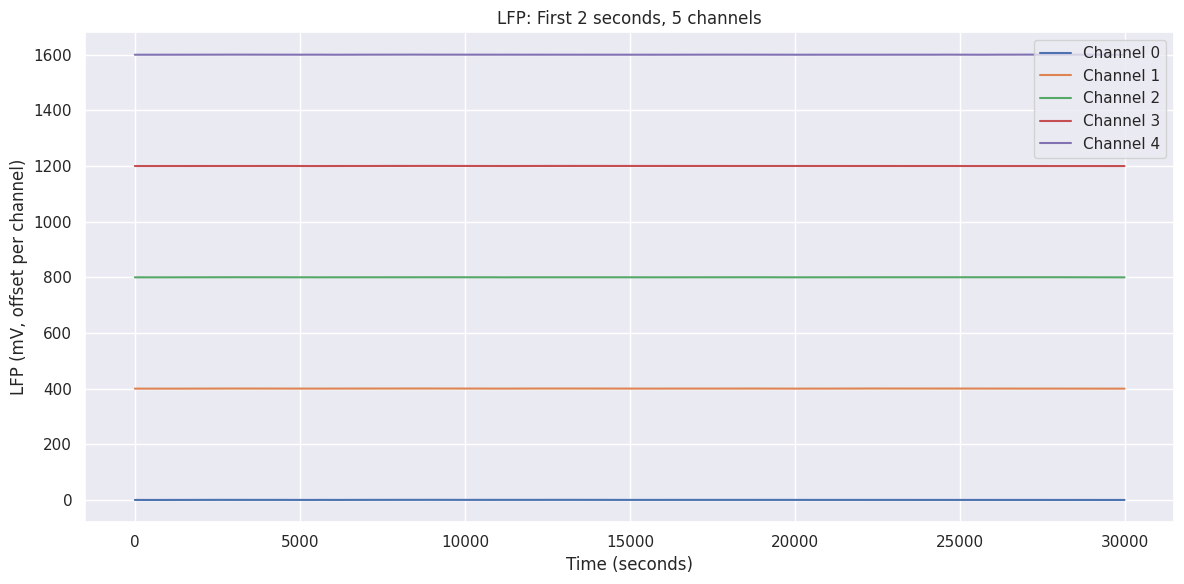

In [7]:
# How many time points correspond to 2 seconds?
n_seconds = 2
sampling_rate = 625  # Hz, from probeA.lfp_sampling_rate
n_samples = n_seconds * sampling_rate
n_channels = min(5, data_shape[1])

data_subset = electrical_series.data[:n_samples, :n_channels]  # shape: (samples, channels)
timestamps_subset = electrical_series.timestamps[:n_samples]

plt.figure(figsize=(12, 6))
for i in range(n_channels):
    plt.plot(timestamps_subset, data_subset[:, i] * 1e3 + i*400, label=f'Channel {i}')
plt.xlabel(f'Time ({electrical_series.timestamps_unit})')
plt.ylabel('LFP (mV, offset per channel)')
plt.title('LFP: First 2 seconds, 5 channels')
plt.legend()
plt.tight_layout()
plt.show()

---
## 7. Advanced: Electrode Location Mapping

Let's see how channels distribute by their assigned reported brain region:

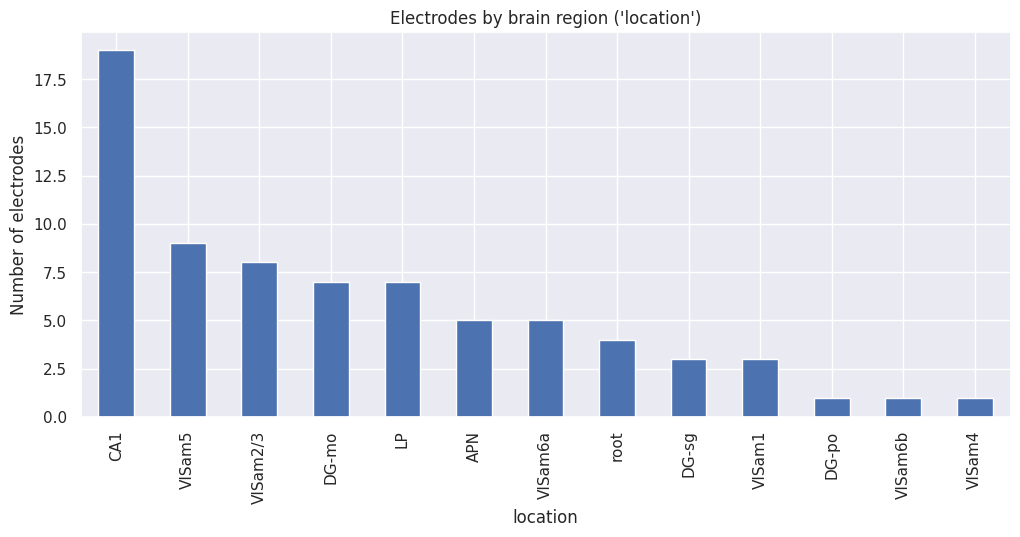

In [8]:
# Value counts of locations
if "location" in electrodes_table.columns:
    location_counts = electrodes_table["location"].value_counts()
    location_counts.plot(kind='bar')
    plt.ylabel("Number of electrodes")
    plt.title("Electrodes by brain region ('location')")
    plt.show()
else:
    print("No 'location' column found in electrode table.")

---
## 8. Neurosift Exploration

You can browse this NWB file interactively on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/1f158fe0-f8ef-495e-b031-da25316a335c/download/&dandisetId=000563&dandisetVersion=draft).

Neurosift provides a web interface to visualize and inspect various aspects of NWB files.

---
## 9. Summary and Future Directions

This notebook demonstrated how to:
- Discover and inspect assets in a Dandiset via the DANDI API
- Load NWB files remotely using PyNWB and remfile
- Summarize and visualize LFP recording channels and electrode metadata

Possible next steps for analysis:
- Explore additional NWB files from the Dandiset (different sessions, probes, or types)
- Analyze spike data or other modalities present (if available)
- Compare responses across brain regions or experimental conditions
- Develop advanced visualizations, e.g., cross-channel correlations, time-frequency analyses

_Remember: This is a large, rich dataset—explore with care and patience!_